In [6]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [7]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [8]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

### 1. Imported the data:

In [9]:
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [10]:
de_data = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc, thousands = ",", dtype= {"Ubigeo":"str"})
de_data.head( 5 )

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0


In [11]:
de_data = de_data.rename({'Ubigeo':'UBIGEO'}, axis =1 )
de_data 

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers

In [86]:
de_data.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
UBIGEO              object
Casos              float64
dtype: object

In [12]:
de_data['Ubigeo departamento'] = de_data['UBIGEO'].astype(str).str[:2] 
de_data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,Ubigeo departamento
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08
...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17


In [13]:
de_data['Ubigeo provincia'] = de_data['UBIGEO'].str[:4] 
de_data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,Ubigeo departamento,Ubigeo provincia
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


#### Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

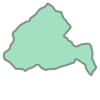

In [57]:
maps_dist = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps_dist["geometry"][0]

#### Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [ ]:
#Select the year
de_data_2021 = de_data[de_data.Año == 2021]
de_data_2021

In [33]:
de_data_2021_1 = de_data_2021.groupby ( ["Ubigeo provincia"], as_index = False).agg ({'Casos': 'sum'})

In [34]:
de_data_2021_1

,Ubigeo provincia,Casos
0,0101,0.0
1,0102,676.0
2,0103,0.0
3,0104,435.0
4,0107,719.0
...,...,...
87,2403,72.0
88,2501,1241.0
89,2502,179.0
90,2503,193.0


In [60]:
#Maps province
maps_prov = maps_dist.dissolve (by = 'IDPROV', as_index = False)
maps_prov

,IDPROV,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,04,CONDORCANQUI,01,NIEVA,SANTA MARIA DE NIEVA,010401,010401,131,NIEVA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,05,LUYA,17,SAN FRANCISCO DEL YESO,SAN FRANCISCO DEL YESO,010517,010517,22,SAN FRANCISCO DEL YESO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,03,ZARUMILLA,01,ZARUMILLA,ZARUMILLA,240301,240301,3,ZARUMILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,03,PADRE ABAD,01,PADRE ABAD,AGUAYTIA,250301,250301,105,PADRE ABAD,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


In [61]:
#Merge
dataset1 = maps_prov.merge(de_data_2021_1, left_on ="IDPROV", right_on= "Ubigeo provincia", how = 'left')
dataset1

,IDPROV,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,Ubigeo provincia,Casos
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0101,0.0
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0102,676.0
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0103,0.0
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,04,CONDORCANQUI,01,NIEVA,SANTA MARIA DE NIEVA,010401,010401,131,NIEVA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0104,435.0
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,05,LUYA,17,SAN FRANCISCO DEL YESO,SAN FRANCISCO DEL YESO,010517,010517,22,SAN FRANCISCO DEL YESO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,03,ZARUMILLA,01,ZARUMILLA,ZARUMILLA,240301,240301,3,ZARUMILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2403,72.0
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2501,1241.0
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2502,179.0
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,03,PADRE ABAD,01,PADRE ABAD,AGUAYTIA,250301,250301,105,PADRE ABAD,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2503,193.0


<AxesSubplot:>

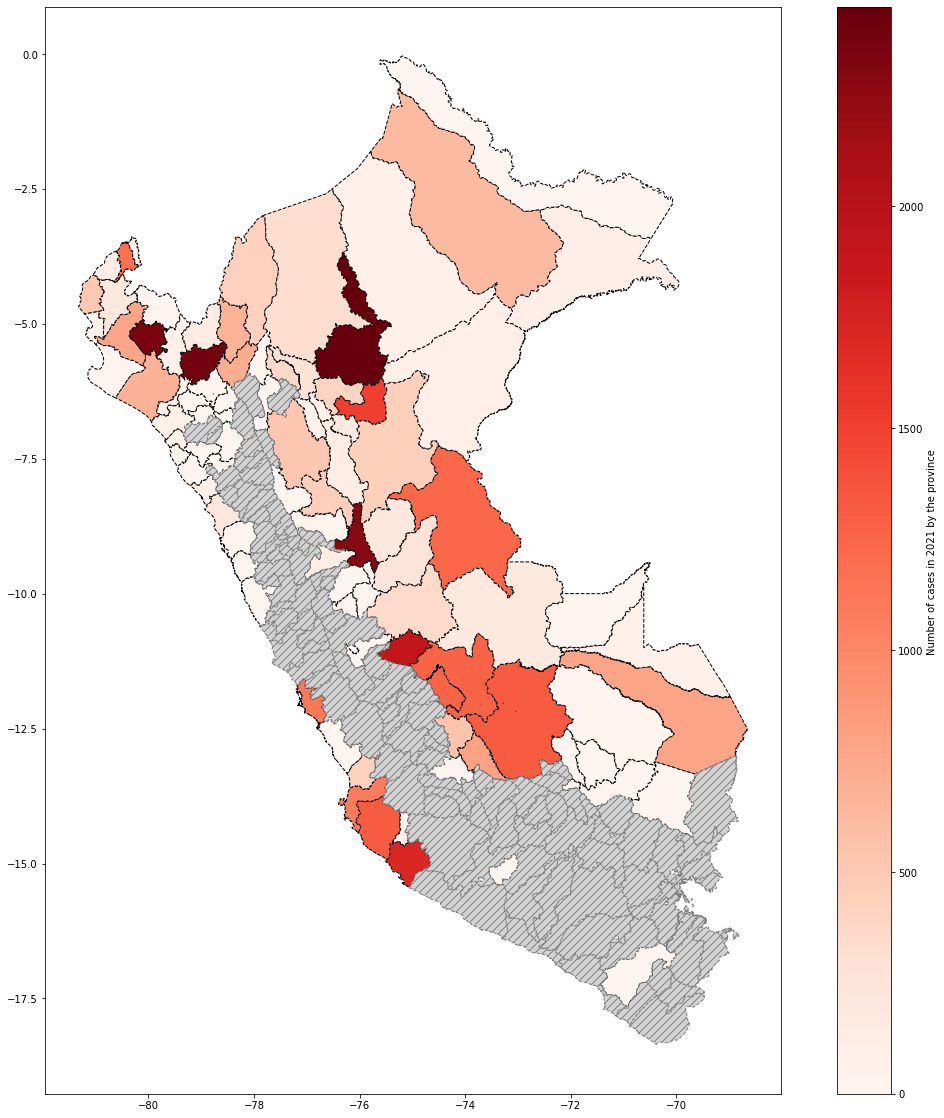

In [63]:
dataset1.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      missing_kwds= {
                          "color": "lightgrey",
                          "edgecolor": "gray",
                          "hatch": "///",
                        "label": "Missing values",},
                      legend = True, legend_kwds={'label': "Number of cases in 2021 by the province ",
                        'orientation': "horiz"})